In [1]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
import seaborn as sns

# To extract and parse fundamental data from finviz website
import requests
from bs4 import BeautifulSoup as bs

# For parsing financial statements data from financialmodelingprep api
from urllib.request import urlopen
import json
def get_jsonparsed_data(url):
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

# Financialmodelingprep api url
base_url = "https://financialmodelingprep.com/api/v3/"

In [2]:
apiKey = "demo"
ticker = "AAPL"

In [3]:
q_cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?period=quarter' + '&apikey=' + apiKey))
q_cash_flow_statement = q_cash_flow_statement.set_index('date').iloc[:4] # extract for last 4 quarters
q_cash_flow_statement = q_cash_flow_statement.apply(pd.to_numeric, errors='coerce')

q_cash_flow_statement.iloc[:,4:].head()

,period,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2020-12-26,NaN,2.875500e+10,2.666000e+09,-58000000.0,0.000000e+00,-1.672200e+10,-1.094500e+10,-950000000.0,2.167000e+10,21599000000,...,-3.224900e+10,0.0,-2.070000e+09,3.771900e+10,3.978900e+10,3.876300e+10,3.500000e+09,3.526300e+10,NaN,NaN
2020-09-26,NaN,1.267300e+10,2.702000e+09,-397000000.0,1.724000e+09,-6.426000e+09,1.768000e+09,-137000000.0,6.725000e+09,38321000000,...,-2.135700e+10,0.0,4.750000e+09,3.978900e+10,3.503900e+10,2.057600e+10,-1.784000e+09,1.879200e+10,NaN,NaN
2020-06-27,NaN,1.125300e+10,2.752000e+09,833000000.0,1.698000e+09,-2.912000e+09,-2.135000e+09,-689000000.0,2.733000e+09,44747000000,...,-1.911600e+10,0.0,-8.010000e+09,3.216400e+10,4.017400e+10,1.627100e+10,-1.565000e+09,1.470600e+10,NaN,NaN
2020-03-28,NaN,1.124900e+10,2.786000e+09,-302000000.0,1.697000e+09,-1.341100e+10,5.269000e+09,727000000.0,-1.243100e+10,47659000000,...,-2.094000e+10,0.0,1.384000e+09,4.115500e+10,3.977100e+10,1.331100e+10,-1.853000e+09,1.145800e+10,NaN,NaN


In [4]:
cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?apikey=' + apiKey))
cash_flow_statement = cash_flow_statement.set_index('date')
cash_flow_statement = cash_flow_statement.apply(pd.to_numeric, errors='coerce')
    
cash_flow_statement.iloc[:,4:].head()

,period,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2020-09-26,NaN,57411000000,11056000000,-2.150000e+08,6.829000e+09,-18780000000,6.917000e+09,-127000000,-4.062000e+09,38321000000,...,-8.682000e+10,0.0,-1.043500e+10,3.978900e+10,50224000000,80674000000,7309000000,73365000000,NaN,NaN
2019-09-28,NaN,55256000000,12547000000,-3.400000e+08,6.068000e+09,41691000000,2.450000e+08,-289000000,-1.923000e+09,57101000000,...,-9.097600e+10,0.0,2.431100e+10,5.022400e+10,25913000000,69391000000,-10495000000,58896000000,NaN,NaN
2018-09-29,NaN,59531000000,10903000000,-3.259000e+10,5.340000e+09,-12421000000,-5.322000e+09,828000000,9.175000e+09,15410000000,...,-8.787600e+10,0.0,5.624000e+09,2.591300e+10,20289000000,77434000000,-13313000000,64121000000,NaN,NaN
2017-09-30,NaN,48351000000,10157000000,5.966000e+09,4.840000e+09,-32000000,-2.093000e+09,-2723000000,9.618000e+09,27831000000,...,0.000000e+00,0.0,-1.950000e+08,2.028900e+10,20484000000,63598000000,-12795000000,50803000000,NaN,NaN
2016-09-24,NaN,45687000000,10505000000,4.938000e+09,4.210000e+09,19095000000,1.095000e+09,217000000,1.791000e+09,27863000000,...,-2.089000e+10,0.0,-6.360000e+08,2.048400e+10,21120000000,66231000000,-12734000000,53497000000,NaN,NaN


In [5]:
ttm_cash_flow_statement = q_cash_flow_statement.sum() # sum up last 4 quarters to get TTM cash flow
cash_flow_statement = cash_flow_statement[::-1].append(ttm_cash_flow_statement.rename('TTM')).drop(['netIncome'], axis=1)
final_cash_flow_statement = cash_flow_statement[::-1] # reverse list to show most recent ones first
final_cash_flow_statement.iloc[:,4:].head()

,period,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,otherNonCashItems,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
TTM,0.0,1.090600e+10,7.600000e+07,5.119000e+09,-3.947100e+10,-6.043000e+09,-1.049000e+09,1.869700e+10,1.523260e+11,3.440000e+09,...,-9.366200e+10,0.0,-3.946000e+09,1.508270e+11,1.547730e+11,8.892100e+10,-1.702000e+09,8.021900e+10,0.0,0.0
2020-09-26,NaN,1.105600e+10,-2.150000e+08,6.829000e+09,-1.878000e+10,6.917000e+09,-1.270000e+08,-4.062000e+09,3.832100e+10,0.000000e+00,...,-8.682000e+10,0.0,-1.043500e+10,3.978900e+10,5.022400e+10,8.067400e+10,7.309000e+09,7.336500e+10,NaN,NaN
2019-09-28,NaN,1.254700e+10,-3.400000e+08,6.068000e+09,4.169100e+10,2.450000e+08,-2.890000e+08,-1.923000e+09,5.710100e+10,5.416000e+09,...,-9.097600e+10,0.0,2.431100e+10,5.022400e+10,2.591300e+10,6.939100e+10,-1.049500e+10,5.889600e+10,NaN,NaN
2018-09-29,NaN,1.090300e+10,-3.259000e+10,5.340000e+09,-1.242100e+10,-5.322000e+09,8.280000e+08,9.175000e+09,1.541000e+10,4.896000e+09,...,-8.787600e+10,0.0,5.624000e+09,2.591300e+10,2.028900e+10,7.743400e+10,-1.331300e+10,6.412100e+10,NaN,NaN
2017-09-30,NaN,1.015700e+10,5.966000e+09,4.840000e+09,-3.200000e+07,-2.093000e+09,-2.723000e+09,9.618000e+09,2.783100e+10,-1.660000e+08,...,0.000000e+00,0.0,-1.950000e+08,2.028900e+10,2.048400e+10,6.359800e+10,-1.279500e+10,5.080300e+10,NaN,NaN


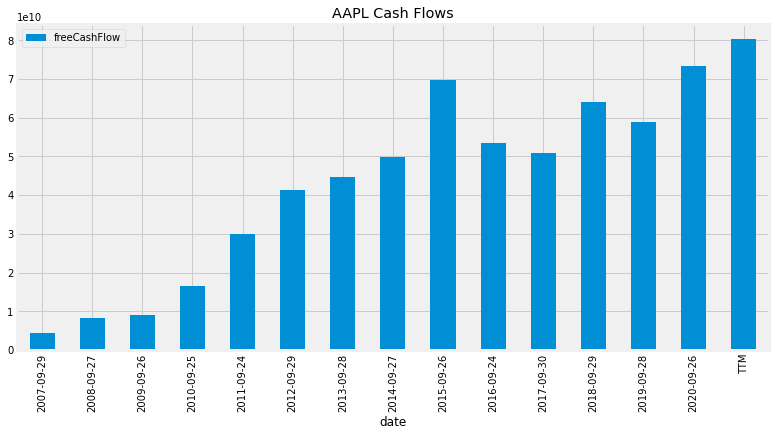

In [6]:
final_cash_flow_statement[['freeCashFlow']].iloc[::-1].iloc[-15:].plot(kind='bar', title=ticker + ' Cash Flows')
plt.show()


In [7]:
q_balance_statement = pd.DataFrame(get_jsonparsed_data(base_url+'balance-sheet-statement/' + ticker + '?period=quarter' + '&apikey=' + apiKey))
q_balance_statement = q_balance_statement.set_index('date')
q_balance_statement = q_balance_statement.apply(pd.to_numeric, errors='coerce')
q_balance_statement.iloc[:,4:].head()

,period,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,retainedEarnings,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,totalInvestments,totalDebt,netDebt,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2020-12-26,NaN,36010000000,4.081600e+10,76826000000,27101000000,4.973000e+09,45206000000,154106000000,37933000000,0.0,...,14301000000,1.790000e+08,0.000000e+00,66224000000,354054000000,8.163200e+10,1.120430e+11,7.603300e+10,NaN,NaN
2020-09-26,NaN,38016000000,5.292700e+10,90943000000,16120000000,4.061000e+09,11264000000,143713000000,36766000000,0.0,...,14966000000,-4.060000e+08,3.380224e+10,65339000000,323888000000,1.538140e+11,1.124360e+11,7.442000e+10,NaN,NaN
2020-06-27,NaN,33383000000,5.964200e+10,93025000000,17882000000,3.978000e+09,10987000000,140065000000,35687000000,0.0,...,24136000000,-5.500000e+08,-2.163000e+09,72282000000,317344000000,1.602340e+11,1.127230e+11,7.934000e+10,NaN,NaN
2020-03-28,NaN,40174000000,5.387700e+10,94051000000,15722000000,3.334000e+09,15691000000,143753000000,35889000000,0.0,...,33182000000,-2.789000e+09,-1.315000e+09,78425000000,320400000000,1.526700e+11,1.095070e+11,6.933300e+10,NaN,NaN
2019-12-28,NaN,39771000000,6.739100e+10,107162000000,20970000000,4.097000e+09,12026000000,163231000000,37031000000,0.0,...,43977000000,-4.180000e+08,-1.240000e+09,89531000000,340618000000,1.672900e+11,1.082920e+11,6.852100e+10,NaN,NaN


In [8]:
cash_flow = final_cash_flow_statement.iloc[0]['freeCashFlow']
total_debt = q_balance_statement.iloc[0]['totalDebt'] 
cash_and_ST_investments = q_balance_statement.iloc[0]['cashAndShortTermInvestments']

print("Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

Free Cash Flow:  80219000000.0
Total Debt:  112043000000.0
Cash and ST Investments:  76826000000.0


In [9]:

# List of data we want to extract from Finviz Table
metric = ['Price', 'EPS next 5Y', 'Beta', 'Shs Outstand']

def fundamental_metric(soup, metric):
    # the table which stores the data in Finviz has html table attribute class of 'snapshot-td2'
    return soup.find(text = metric).find_next(class_='snapshot-td2').text
   
def get_finviz_data(ticker):
    try:
        url = ("http://finviz.com/quote.ashx?t=" + ticker.lower())
        soup = bs(requests.get(url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}).content)
        dict_finviz = {}        
        for m in metric:   
            dict_finviz[m] = fundamental_metric(soup,m)
        for key, value in dict_finviz.items():
            # replace percentages
            if (value[-1]=='%'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])
            # billion
            if (value[-1]=='B'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000000  
            # million
            if (value[-1]=='M'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000
            try:
                dict_finviz[key] = float(dict_finviz[key])
            except:
                pass 
    except Exception as e:
        print (e)
        print ('Not successful parsing ' + ticker + ' data.')        
    return dict_finviz

finviz_data = get_finviz_data(ticker)

finviz_data

{'Price': 134.9,
 'EPS next 5Y': 14.69,
 'Beta': 1.27,
 'Shs Outstand': 16940000000.000002}

In [10]:
Beta = finviz_data['Beta']

discount_rate = 7
if(Beta<0.80):
    discount_rate = 5
elif(Beta>=0.80 and Beta<1):
    discount_rate = 6
elif(Beta>=1 and Beta<1.1):
    discount_rate = 6.5
elif(Beta>=1.1 and Beta<1.2):
    discount_rate = 7
elif(Beta>=1.2 and Beta<1.3):
    discount_rate =7.5
elif(Beta>=1.3 and Beta<1.4):
    discount_rate = 8
elif(Beta>=1.4 and Beta<1.6):
    discount_rate = 8.5
elif(Beta>=1.61):
    discount_rate = 9   

print("Discount Rate: ", discount_rate)

Discount Rate:  7.5


In [11]:
EPS_growth_5Y = finviz_data['EPS next 5Y']
EPS_growth_6Y_to_10Y = EPS_growth_5Y/2  # Half the previous growth rate, conservative estimate
EPS_growth_11Y_to_20Y  = np.minimum(EPS_growth_6Y_to_10Y, 4)  # Slightly higher than long term inflation rate, conservative estimate

shares_outstanding = finviz_data['Shs Outstand']

print("Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

print("EPS Growth 5Y: ", EPS_growth_5Y)
print("EPS Growth 6Y to 10Y: ", EPS_growth_6Y_to_10Y)
print("EPS Growth 11Y to 20Y: ", EPS_growth_11Y_to_20Y)

print("Discount Rate: ", discount_rate)

print("Shares Outstanding: ", shares_outstanding)

Free Cash Flow:  80219000000.0
Total Debt:  112043000000.0
Cash and ST Investments:  76826000000.0
EPS Growth 5Y:  14.69
EPS Growth 6Y to 10Y:  7.345
EPS Growth 11Y to 20Y:  4.0
Discount Rate:  7.5
Shares Outstanding:  16940000000.000002


Discounted Cash Flows

Year 1: $85584345209.30232
Year 2: $91308544670.278
Year 3: $97415599890.55054
Year 4: $103931117687.88132
Year 5: $110882417559.28476
Year 6: $110722540585.12952
Year 7: $110562894131.26259
Year 8: $110403477865.3059
Year 9: $110244291455.36058
Year 10: $110085334570.00633
Year 11: $106501160886.33173
Year 12: $103033681229.56743
Year 13: $99679096259.30246
Year 14: $96433730334.581
Year 15: $93294027486.47835
Year 16: $90256547521.80232
Year 17: $87317962253.65063
Year 18: $84475051854.69458
Year 19: $81724701329.1929
Year 20: $79063897099.87033


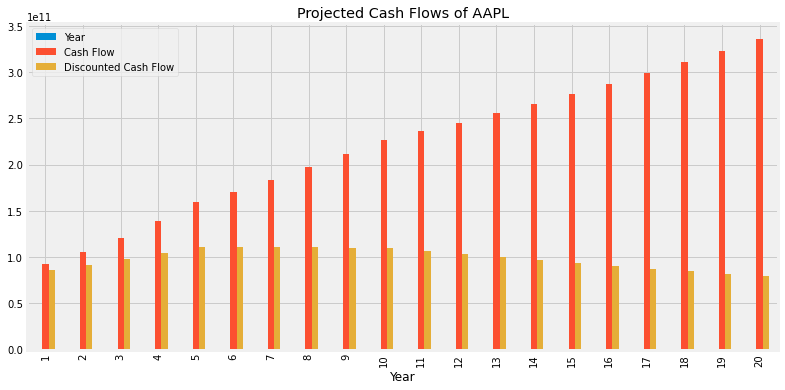

In [12]:

def calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                  shares_outstanding, discount_rate):   
    
    # Convert all percentages to decmials
    EPS_growth_5Y_d = EPS_growth_5Y/100
    EPS_growth_6Y_to_10Y_d = EPS_growth_6Y_to_10Y/100
    EPS_growth_11Y_to_20Y_d = EPS_growth_11Y_to_20Y/100
    discount_rate_d = discount_rate/100
    print("Discounted Cash Flows\n")
    
    # Lists of projected cash flows from year 1 to year 20
    cash_flow_list = []
    cash_flow_discounted_list = []
    year_list = []
    
    
    # Years 1 to 5
    for year in range(1, 6):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_5Y_d)        
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 6 to 10
    for year in range(6, 11):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_6Y_to_10Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 11 to 20
    for year in range(11, 21):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_11Y_to_20Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    intrinsic_value = (sum(cash_flow_discounted_list) - total_debt + cash_and_ST_investments)/shares_outstanding
    df = pd.DataFrame.from_dict({'Year': year_list, 'Cash Flow': cash_flow_list, 'Discounted Cash Flow': cash_flow_discounted_list})
    df.index = df.Year
    df.plot(kind='bar', title = 'Projected Cash Flows of ' + ticker)
    plt.show()

    return intrinsic_value


intrinsic_value = calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                  shares_outstanding, discount_rate)

In [13]:
print("Intrinsic Value: ", intrinsic_value)
current_price = finviz_data['Price']
print("Current Price: ", current_price)
print("Margin of Safety: ", (1-current_price/intrinsic_value)*100) 

Intrinsic Value:  113.79595158676702
Current Price:  134.9
Margin of Safety:  -18.54551776136042
